# Tutorial 3: Procedural Generation of Gridded Layouts
This tutorial will build upon the `Grid` and `Layout` objects, and how to use the `GriddedLayoutGenerator` to automatically generate many layouts based on `Grid` objects,
with the option to apply area, exclusion, and bathymetry constraints to all generated layouts.

## 1. The GriddedLayoutGenerator Object
The `GriddedLayoutGenerator` object can be imported from the `layowt.layouts` module.

This object takes care of generating `Layout` objects based on the combination of many user inputs, for example, different row and column spacings,
grid angles, grid shear angles, grid origins, and rotor sizes. Can also take a number of turbines, and will only return those `Layout` objects with
that specific number of valid locations.

Your first have to define a generator with it's instructions, and then call its `generate_layouts` mehtod which returns a list of `Layout`objects.

Let's look at a simple case of layouts with row and column spacings between 5 and 8 rotor diameters, in steps of 0.25 rotor diameters, grid angles
between 0 and 90 in steps of 5 degrees, columns shears between 0 and 45 degrees in steps of 5 degrees, and a single origin at (0, 0) and a single
rotor diameter of 250m.

23,328 `Layout` objects have been created automatically.

In [4]:
from layowt.layouts import GriddedLayoutGenerator
import numpy as np

layout_gen = GriddedLayoutGenerator(
                                    n_cols = 20,
                                    n_rows = 20,
                                    row_steps = np.arange(5, 8, 0.25),
                                    col_steps = np.arange(5, 8, 0.25),
                                    angles = np.arange(0, 90, 5),
                                    x_shears = np.arange(0, 45, 5),
                                    origins = [(0, 0)],
                                    scales = [250]
                                )

layouts = layout_gen.generate_layouts()
print(len(layouts))

23328


Now, lets look at a more complex example where we have various rotor diameters. We will also pass the `GriddedLayoutGenerator` area,
exclusion and bathymetry constraints.

72


(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

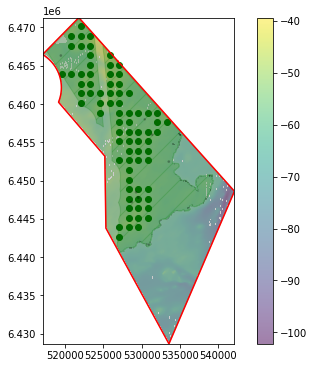

In [16]:
from layowt.layouts import geoms_from_postgis

areas = geoms_from_postgis(username="name.surname@ow-postgre", 
                           password="**************",
                           schema="offshore",
                           db_name="proj_uk_caledonia",
                           table="OW|Caledonia_OWF_Project_Boundary",
                           target_epsg=32630)

exclusions = geoms_from_postgis(username="name.surname@ow-postgre", 
                           password="**************",
                           schema="offshore",
                           db_name="proj_uk_caledonia",
                           table="OW|Turbine_Exclusion_Areas_Fixed|20220525",
                           target_epsg=32630
                        )

layout_gen = GriddedLayoutGenerator(
                                    n_cols = 40,
                                    n_rows = 40,
                                    row_steps = np.arange(5, 6, 0.5),
                                    col_steps = np.arange(5, 6, 0.5),
                                    angles = np.arange(0, 90, 10),
                                    scales = [250, 236],
                                    areas=areas,
                                    exclusions=exclusions,
                                    origins=[(areas[0].centroid.x, areas[0].centroid.y)],
                                    bathymetry_path="bathymetry.tif",
                                    bathymetry_limits=(0, 55)
                            )

layouts = layout_gen.generate_layouts()

print(len(layouts))
layouts[0].plot(show_bathy=True)


.. caution::
Performance can suffer significantly when complex geometries or rasters are passed into the `GriddedLayoutGenerator`.


The `GriddedLayoutGenerator` has a long list of arguments it can take for `Layout` generation. Please refer to the API Reference for a complete description of the class.

## 2. Exporting Layouts to Legacy .csv Format

.. attention::
    In order for LayOWt version 0.1.x to be compatible with the legacy layout optimisation workflows, the utility function `layouts_to_legacy_csv` has been added. This allows
    the user to pass a list of `Layout` objects and they will be exported to disk in a csv format compatible with the legacy workflow.
    An example of how to use this function is shown below. This example will produce the following two files in disk:

        - layout_outputs.csv
        - INFO_layout_outputs.csv


In [17]:
from layowt.layouts import layouts_to_legacy_csv

layouts_to_legacy_csv(layouts, "layout_outputs.csv")